# Hands-On Exercise 8.1:
# Generating Association Rules From Transaction Data
***

## Objectives

#### In this exercise, you will perform association rule mining with Python. This exercise allows you to analyze the transaction data by identifying frequently co-occurring items in the data set. The goal is to show you how association rules mining with Python can be used to draw relationships between seemingly unrelated items.

### Overview

You will work on the Online Retail data set. You will:

● Use the Apriori algorithm on the data set to mine association rules <br>
● Evaluate the derived rules through their measures of support, confidence,
and lift

1. ❏ Import the **csv** and **pandas** libraries


In [7]:
import csv
import pandas as pd

2. ❏ Create a sparse matrix from the external dataset *Groceries.csv*

In [8]:
with open('Groceries.csv', 'r') as f:  
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f)) 

3. ❏ Import the **TransactionEncoder** function from **mlxtend.preprocessing**

In [9]:
from mlxtend.preprocessing import TransactionEncoder

4. ❏ Transform the unique labels in the list into a one-hot encoded array and convert them into a dataframe for display

In [10]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)

df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


5. ❏ Import the **apriori** and **association_rules** functions from **mlxtend.frequent_patterns**

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

6. ❏ Generate itemsets using the **apriori()** function <br><br>
*Hint: Try different values for min_support to see different results. For example, try a min_support of .07 and then try smaller and greater values to see different results*

In [12]:
frequent_itemsets = apriori(df, min_support=0.07, use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


7. ❏ Use a bar chart to visualize the itemset frequencies<br><br>
*Hint: You may need to set an appropriate value for min_support in step 6, to avoid getting too cluttered a visualization*<br><br>
*Hint2: If the the visualization doesn't appear when you first execute the cell, try re-executing it*

<AxesSubplot:xlabel='itemsets'>

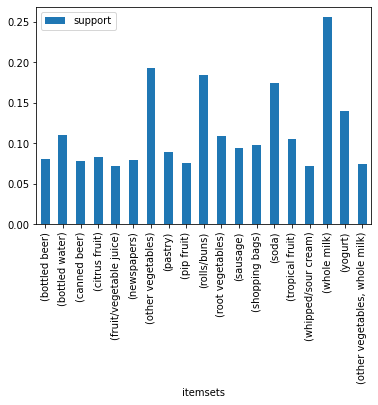

In [13]:
frequent_itemsets.plot.bar(x='itemsets', y='support')

8. ❏ Explore the sizes of the transactions by summing each row (axis=1) and using the **.value_counts()** method to count the number of transactions of each size. The result could then be stored in a dataframe and transposed for easier display

In [14]:
pd.DataFrame(df.sum(axis=1).value_counts()).T

,1,2,3,4,5,6,7,8,9,10,...,21,20,23,22,29,26,32,27,28,24
0,2159,1643,1299,1005,855,645,545,438,350,246,...,11,9,6,4,3,1,1,1,1,1


9. ❏  Replace **.value_counts()** from the previos step with **.describe()** to generate summary statistics on the transaction sizes

In [15]:
df.sum(axis=1).describe()

count    9835.000000
mean        4.409456
std         3.589385
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        32.000000
dtype: float64

10. ❏ Use the **.sum()** function on the entire dataset to explore the frequency of items across transactions

In [16]:
df.sum()

Instant food products      79
UHT-milk                  329
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               414
white wine                187
whole milk               2513
yogurt                   1372
zwieback                   68
Length: 169, dtype: int64

11. ❏ Divide the summed values in step 10 by the number of rows to explore the proportion of transactions that contain each item<br><br>
*Hint: .shape[0] will return the number of rows*

In [17]:
df.sum()/df.shape[0]

Instant food products    0.008033
UHT-milk                 0.033452
abrasive cleaner         0.003559
artif. sweetener         0.003254
baby cosmetics           0.000610
                           ...   
white bread              0.042095
white wine               0.019014
whole milk               0.255516
yogurt                   0.139502
zwieback                 0.006914
Length: 169, dtype: float64

12. ❏ Find association rules in the dataset using the **association_rules()** function and a **confidence** metric

In [18]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548


13. ❏ Sort the rules by **lift**

In [19]:
rules.sort_values(by=['lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548


14. ❏ Find rules that have a chocolate antecedent<br><br>
*Hint: You may need to modify the min_support value in step 6 to a much lower value (eg. min_support=.01), and re-execute steps 6 and 12, in order to generate any rules in this step*

In [20]:
rules[rules['antecedents'] == {'chocolate'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
